### Demo: save and read sentences 

In [58]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]

with open('listfile.txt', 'w') as fh:
    for sentence in sentences:
        fh.writelines("{:s}\n".format(" ".join([word for word in sentence])))

def read_sentences(filename = "listfile.txt"):
    with open(filename, 'r') as fh:
        s = fh.readline()
        while s != "":
            yield s.strip().split(" ")
            s = fh.readline()
    
for s in read_sentences():
    print(s)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec']
['this', 'is', 'the', 'second', 'sentence']
['yet', 'another', 'sentence']
['one', 'more', 'sentence']
['and', 'the', 'final', 'sentence']


### A memory-friendly sentence iterator

In [59]:
import os
class MySentences(object):
    def __init__(self, fnames, dirname = "./"):
        self.fnames = fnames
        self.dirname = dirname

    def __iter__(self):
        for fname in self.fnames:
            with open(os.path.join(self.dirname, fname), 'r') as fh:
                s = fh.readline()
                while s != "":
                    yield s.strip().split(" ")
                    s = fh.readline()

sentences = MySentences(["listfile.txt"]) 

In [73]:
from gensim.models import Word2Vec


'''
size: (default 100) The number of dimensions of the embedding
window: (default 5) The maximum distance between a target word and words around the target word.
min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.
workers: (default 3) The number of threads to use while training. You can increase workers to match the number of cores (e.g. 8)in most modern computers.
sg: The training algorithm, either CBOW (0) or skip gram (1).
'''
# train model
model = Word2Vec(sentences, size=100, window=50, min_count=1, workers=4, sg = 1, iter=10)
# summarize the loaded model
print(model)

# summarize vocabulary
words = list(model.wv.vocab)
print(words)

# access vector for one word
# print(model.wv['sentence'])

# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')

# preserve only gensim.models.KeyedVectors instance to save RAM
word_vectors = model.wv
del model

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


### Play with word embeddings

In [74]:
# find words that are close to positive words, far from negative words
word_vectors.most_similar(positive=['for', 'one'], negative=['and'], topn = 3)

# 
word_vectors.similarity('second', 'final')

0.05933652230346868

### Visualize word Embeddings

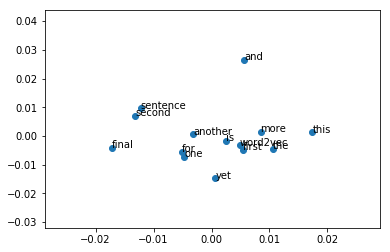

In [70]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]

# get all word vectors
X = word_vectors[word_vectors.vocab]
# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(word_vectors.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()